In [1]:
import cira 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from os.path import exists

cira.auth.KEY_FILE = "../alpc_key.json"
assert cira.auth.check_keys(), "the set keys dose not work"

SYMBOL = "INTC"
SYM_HIST_FILE = f'./{SYMBOL.replace("/", "_")}.csv'

stk = cira.Stock(SYMBOL)

if not exists(SYM_HIST_FILE): # chacheing historical data  
    start = datetime(2015, 5, 1)
    end = datetime.now().date()
    stk.save_historical_data(SYM_HIST_FILE, start, end)

data = stk.load_historical_data(SYM_HIST_FILE)
data.drop(columns=["symbol"], inplace=True)
data.head()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2016-01-04 05:00:00+00:00,26.96,27.06,26.62,27.05,32165978.0,122840.0,26.88
2016-01-05 05:00:00+00:00,27.02,27.05,26.68,26.92,17905707.0,87505.0,26.85
2016-01-06 05:00:00+00:00,26.46,26.67,26.10,26.32,26939523.0,121984.0,26.39
2016-01-07 05:00:00+00:00,25.68,26.26,25.33,25.33,41368839.0,163862.0,25.63
2016-01-08 05:00:00+00:00,25.53,25.64,25.01,25.07,32404640.0,142641.0,25.31


### Bollinger bands

In [2]:
data["sma"] = data["close"].rolling(window=20).mean() # simple moving avrage 
data["sd"] = data["close"].rolling(window=20).std()

data["ub"] = data["sma"] + 2 * data["sd"]
data["lb"] = data["sma"] - 2 * data["sd"]
data.tail()

,open,high,low,close,volume,trade_count,vwap,sma,sd,ub,lb
timestamp,,,,,,,,,,,
2024-04-24 04:00:00+00:00,34.72,35.04,34.20,34.36,53261096.0,277925.0,34.54,37.9800,3.519954,45.019907,30.940093
2024-04-25 04:00:00+00:00,34.42,35.15,34.36,34.97,66549403.0,409021.0,34.52,37.5490,3.318879,44.186758,30.911242
2024-04-26 04:00:00+00:00,31.65,32.11,30.52,31.75,119842494.0,629025.0,31.45,36.9370,3.194858,43.326716,30.547284
2024-04-29 04:00:00+00:00,31.73,31.78,30.95,31.23,58533264.0,335062.0,31.25,36.2815,2.929946,42.141391,30.421609
2024-04-30 04:00:00+00:00,30.92,31.05,30.30,30.35,72346359.0,315391.0,30.65,35.6110,2.649433,40.909865,30.312135


### Relative Strength Index

In [3]:
delta = data["open"].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta<0,0)
win_size = 20
avg_gain = gain.rolling(win_size).mean()
avg_loss = loss.rolling(win_size).mean()
rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))
data["rsi"] = rsi
data.tail()

,open,high,low,close,volume,trade_count,vwap,sma,sd,ub,lb,rsi
timestamp,,,,,,,,,,,,
2024-04-24 04:00:00+00:00,34.72,35.04,34.20,34.36,53261096.0,277925.0,34.54,37.9800,3.519954,45.019907,30.940093,23.257576
2024-04-25 04:00:00+00:00,34.42,35.15,34.36,34.97,66549403.0,409021.0,34.52,37.5490,3.318879,44.186758,30.911242,19.209915
2024-04-26 04:00:00+00:00,31.65,32.11,30.52,31.75,119842494.0,629025.0,31.45,36.9370,3.194858,43.326716,30.547284,8.776780
2024-04-29 04:00:00+00:00,31.73,31.78,30.95,31.23,58533264.0,335062.0,31.25,36.2815,2.929946,42.141391,30.421609,5.848787
2024-04-30 04:00:00+00:00,30.92,31.05,30.30,30.35,72346359.0,315391.0,30.65,35.6110,2.649433,40.909865,30.312135,5.666897


### Moving Avrage 

In [4]:
data["20_sma"]  =  data["open"].rolling(window=20).mean()
data["50_sma"]  =  data["open"].rolling(window=50).mean()
data["200_sma"] =  data["open"].rolling(window=200).mean()
data.tail()

,open,high,low,close,volume,trade_count,vwap,sma,sd,ub,lb,rsi,20_sma,50_sma,200_sma
timestamp,,,,,,,,,,,,,,,
2024-04-24 04:00:00+00:00,34.72,35.04,34.20,34.36,53261096.0,277925.0,34.54,37.9800,3.519954,45.019907,30.940093,23.257576,38.2085,41.3266,39.60115
2024-04-25 04:00:00+00:00,34.42,35.15,34.36,34.97,66549403.0,409021.0,34.52,37.5490,3.318879,44.186758,30.911242,19.209915,37.8110,41.1584,39.61140
2024-04-26 04:00:00+00:00,31.65,32.11,30.52,31.75,119842494.0,629025.0,31.45,36.9370,3.194858,43.326716,30.547284,8.776780,37.2145,40.9186,39.60350
2024-04-29 04:00:00+00:00,31.73,31.78,30.95,31.23,58533264.0,335062.0,31.25,36.2815,2.929946,42.141391,30.421609,5.848787,36.5955,40.6616,39.59375
2024-04-30 04:00:00+00:00,30.92,31.05,30.30,30.35,72346359.0,315391.0,30.65,35.6110,2.649433,40.909865,30.312135,5.666897,35.9540,40.4030,39.58175


In [5]:
data.keys()

Index(['open', 'high', 'low', 'close', 'volume', 'trade_count', 'vwap', 'sma',
       'sd', 'ub', 'lb', 'rsi', '20_sma', '50_sma', '200_sma'],
      dtype='object')

In [6]:
data = data.fillna(0)
data.head()

,open,high,low,close,volume,trade_count,vwap,sma,sd,ub,lb,rsi,20_sma,50_sma,200_sma
timestamp,,,,,,,,,,,,,,,
2016-01-04 05:00:00+00:00,26.96,27.06,26.62,27.05,32165978.0,122840.0,26.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-05 05:00:00+00:00,27.02,27.05,26.68,26.92,17905707.0,87505.0,26.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-06 05:00:00+00:00,26.46,26.67,26.10,26.32,26939523.0,121984.0,26.39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-07 05:00:00+00:00,25.68,26.26,25.33,25.33,41368839.0,163862.0,25.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-08 05:00:00+00:00,25.53,25.64,25.01,25.07,32404640.0,142641.0,25.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Fixed-Horizon Return

In [7]:
horizon = 10
data['return'] = (data['close'].shift(-horizon) - data['close']) / data['close']
threshold = 0.03
data['signal'] = np.where(data['return'] > threshold, 1, np.where(data['return'] < -threshold, -1, 0))
data.head()

,open,high,low,close,volume,trade_count,vwap,sma,sd,ub,lb,rsi,20_sma,50_sma,200_sma,return,signal
timestamp,,,,,,,,,,,,,,,,,
2016-01-04 05:00:00+00:00,26.96,27.06,26.62,27.05,32165978.0,122840.0,26.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.123475,-1
2016-01-05 05:00:00+00:00,27.02,27.05,26.68,26.92,17905707.0,87505.0,26.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.125557,-1
2016-01-06 05:00:00+00:00,26.46,26.67,26.10,26.32,26939523.0,121984.0,26.39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.103343,-1
2016-01-07 05:00:00+00:00,25.68,26.26,25.33,25.33,41368839.0,163862.0,25.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.060008,-1
2016-01-08 05:00:00+00:00,25.53,25.64,25.01,25.07,32404640.0,142641.0,25.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.060630,-1


In [8]:
data["signal"].value_counts()

signal
 0    901
 1    648
-1    546
Name: count, dtype: int64

In [9]:
risk_free_rate = 0.02
daily_risk_free_rate = risk_free_rate / 252

# Calculate the excess returns
data['excess_return'] = data['return'] - daily_risk_free_rate

# Define the rolling window size (e.g., 5 periods)
rolling_window = 10

# Calculate the rolling average excess return and rolling standard deviation
data['rolling_avg_excess_return'] = data['excess_return'].rolling(window=rolling_window).mean()
data['rolling_std_dev'] = data['return'].rolling(window=rolling_window).std()

# Calculate the rolling Sharpe Ratio
data['rolling_sharpe_ratio'] = data['rolling_avg_excess_return'] / data['rolling_std_dev']

# Fill NaNs (optional, depends on how you want to handle initial periods)
data = data.fillna(0)
data.head()

,open,high,low,close,volume,trade_count,vwap,sma,sd,ub,...,rsi,20_sma,50_sma,200_sma,return,signal,excess_return,rolling_avg_excess_return,rolling_std_dev,rolling_sharpe_ratio
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-04 05:00:00+00:00,26.96,27.06,26.62,27.05,32165978.0,122840.0,26.88,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.123475,-1,-0.123554,0.0,0.0,0.0
2016-01-05 05:00:00+00:00,27.02,27.05,26.68,26.92,17905707.0,87505.0,26.85,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.125557,-1,-0.125637,0.0,0.0,0.0
2016-01-06 05:00:00+00:00,26.46,26.67,26.10,26.32,26939523.0,121984.0,26.39,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.103343,-1,-0.103423,0.0,0.0,0.0
2016-01-07 05:00:00+00:00,25.68,26.26,25.33,25.33,41368839.0,163862.0,25.63,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.060008,-1,-0.060087,0.0,0.0,0.0
2016-01-08 05:00:00+00:00,25.53,25.64,25.01,25.07,32404640.0,142641.0,25.31,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.060630,-1,-0.060710,0.0,0.0,0.0


<Axes: xlabel='timestamp'>

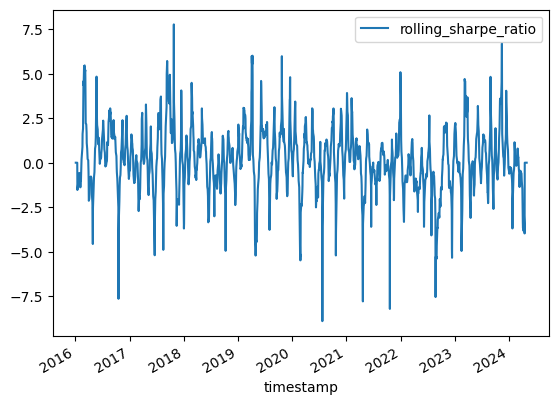

In [10]:
data[["rolling_sharpe_ratio"]].plot()